In this notebook, let us illustrate the cluster algebra approach for computing $q$-characters of Kirillov-Reshetikhin modules in [HL16].

REFERENCE:
- [FM01] Edward Frenkel and Evgeny Mukhin, 
Combinatorics of $q$-characters of finite-dimensional representations of quantum affine algebras, 
Comm. Math. Phys. **216** (2001), no. 1, 23--57.
        
- [HL16] David Hernandez and Bernard Leclerc, 
A cluster algebra approach to $q$-characters of Kirillov-Reshetikhin modules, 
J. Eur. Math. Soc. (JEMS) **18** (2016), no. 5, 1113--1159.

REFERENCE for CODE:
- [MS11] G. Musiker, C. Stump, 
A Compendium on the cluster algebra and quiver package in Sage, preprint (2011), 
arXiv:1102.4844 (Sem. Lothar. Combin. 67, 67 pages, 2011).

---

In [1]:
load("HLalgorithm.py")

In [2]:
G = G_minus(['A',3],3); G

The quiver G^- of type ['A', 3] with adjacency 9 x 9 ( max = 3 ).

In [3]:
G.matrix()

[ 0 -1  0 -1  1  0  0  0  0]
[ 1  0  1  0 -1  0  0  0  0]
[ 0 -1  0  0  1 -1  0  0  0]
[ 1  0  0  0 -1  0 -1  1  0]
[-1  1 -1  1  0  1  0 -1  0]
[ 0  0  1  0 -1  0  0  1 -1]
[ 0  0  0  1  0  0  0 -1  0]
[ 0  0  0 -1  1 -1  1  0  1]
[ 0  0  0  0  0  1  0 -1  0]

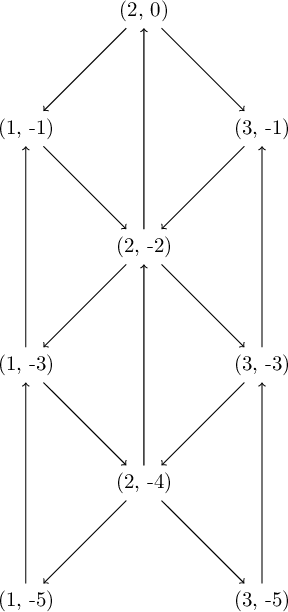

In [5]:
G.quiver(tikz=True) # if tikz is True, then need the optional package `slabbe`

In [6]:
G.show_vertex()


Index    : { Label(Numbering)    : Vertex }
-------------------------------------------------
  1              0                (1, -1)
  1              3                (1, -3)
  1              6                (1, -5)

  2              1                (2, 0)
  2              4                (2, -2)
  2              7                (2, -4)

  3              2                (3, -1)
  3              5                (3, -3)
  3              8                (3, -5)



In [7]:
G.show_current_cluster_variables()


Index      Label          Vertex         cluster variable
  1         0             (1, -1)        x0
  1         3             (1, -3)        x3
  1         6             (1, -5)        x6
  2         1             (2,  0)        x1
  2         4             (2, -2)        x4
  2         7             (2, -4)        x7
  3         2             (3, -1)        x2
  3         5             (3, -3)        x5
  3         8             (3, -5)        x8



In [9]:
G.show_initial_monomials()
# initial monomials attached to vertex


y_{1,-1}^{(0)} =  Y1[-1]
y_{1,-3}^{(0)} =  Y1[-3]*Y1[-1]
y_{1,-5}^{(0)} =  Y1[-5]*Y1[-3]*Y1[-1]

y_{2, 0}^{(0)} =  Y2[0]
y_{2,-2}^{(0)} =  Y2[-2]*Y2[0]
y_{2,-4}^{(0)} =  Y2[-4]*Y2[-2]*Y2[0]

y_{3,-1}^{(0)} =  Y3[-1]
y_{3,-3}^{(0)} =  Y3[-3]*Y3[-1]
y_{3,-5}^{(0)} =  Y3[-5]*Y3[-3]*Y3[-1]



In [10]:
mu = G.mu(3); mu
# the standard sequence `mu` in [HL16]

[1, 4, 7, 0, 3, 6, 2, 5, 8]

In [11]:
G.show_current_mutations()


Label      Vertex         total count         order
---------------------------------------------------------
  0        (1, -1)        0                   []
  3        (1, -3)        0                   []
  6        (1, -5)        0                   []

  1        (2, 0)         0                   []
  4        (2, -2)        0                   []
  7        (2, -4)        0                   []

  2        (3, -1)        0                   []
  5        (3, -3)        0                   []
  8        (3, -5)        0                   []



In [12]:
G.mutations(seq=mu); G.show_current_cluster_variables()
# applying the mutation sequence to G- and display the resulting
# cluster variables


Index      Label          Vertex         cluster variable
  1         0             (1, -1)        (x0*x2 + x1*x3 + x4)/(x0*x1)                                                                                                                                                     
  1         3             (1, -3)        (x0*x1*x3*x5 + x0*x2*x4*x6 + x1*x3*x4*x6 + x0^2*x2*x7 + x4^2*x6 + x0*x4*x7)/(x0*x1*x3*x4)                                                                                        
  1         6             (1, -5)        (x0*x1*x3*x4*x6*x8 + x0*x1*x3^2*x5 + x0^2*x2*x3*x7 + x0*x1*x3*x5*x7 + x0*x2*x4*x6*x7 + x1*x3*x4*x6*x7 + x0^2*x2*x7^2 + x0*x3*x4*x7 + x4^2*x6*x7 + x0*x4*x7^2)/(x0*x1*x3*x4*x6*x7)
  2         1             (2,  0)        (x0*x2 + x4)/x1                                                                                                                                                                  
  2         4             (2, -2)        (x1*x3*x5 + x0*x2*x7 + x

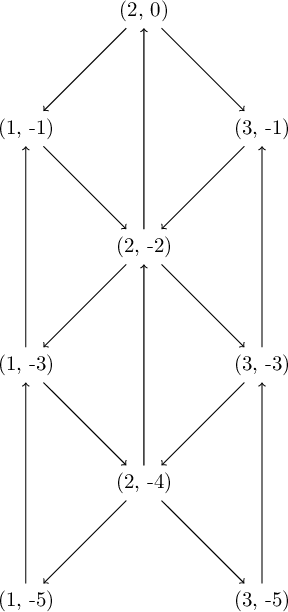

In [13]:
G.quiver(tikz=True)
# i.e. the periodicity of quiver G-

By the change of variables, we obtain truncated $q$-characters as follows:

In [17]:
G.change_of_variables(0)

Y2[0]^-1*Y3[-1] + Y1[-3] + Y1[-1]^-1*Y2[-2]

In [18]:
G.change_of_variables(1)

Y1[-1]*Y2[0]^-1*Y3[-1] + Y2[-2]

In [19]:
G.change_of_variables(2)

Y1[-1]*Y2[0]^-1 + Y3[-3] + Y2[-2]*Y3[-1]^-1

In [20]:
G.mutations(seq=mu); G.show_current_cluster_variables()
# repeat this process


Index      Label          Vertex         cluster variable
  1         0             (1, -1)        (x1*x3*x5 + x2*x4*x6 + x0*x2*x7 + x3*x4)/(x2*x3*x4)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
  1         3             (1, -3)        (x1*x3*x4*x5*x6*x8 + x1*x3^2*x5^2 + x0*x2*x3*x5*x7 + x1*x3*x5^2*x7 + x2*x3*x4*x6*x7 + x2*x4*x5*x6*x7 + x0*x2*x5*x7^2 + x3*x4^2*x6*x8 + x3^2*x4*x5 + x3*x4*x5*x7)/(x2*x3*x4*x5*x6*x7)                            

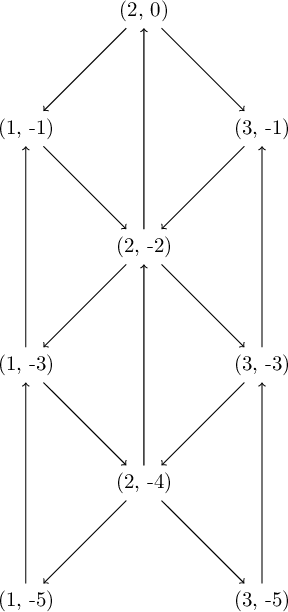

In [26]:
G.quiver(tikz=True)

By the change of variables, we obtain truncated $q$-characters as follows.  
Compare the $q$-character formulas in `qchar_graphs.pdf`.

In [21]:
G.change_of_variables(0)

Y2[-2]^-1*Y3[-3] + Y1[-5] + Y1[-3]^-1*Y2[-4] + Y3[-1]^-1

In [22]:
G.change_of_variables(1)

Y1[-3]*Y2[-2]^-1*Y3[-3] + Y2[-4] + Y2[0]^-1 + Y1[-3]*Y3[-1]^-1 + Y1[-1]^-1*Y3[-3] + Y1[-1]^-1*Y2[-2]*Y3[-1]^-1

In [23]:
G.change_of_variables(2)

Y1[-3]*Y2[-2]^-1 + Y2[-4]*Y3[-3]^-1 + Y3[-5] + Y1[-1]^-1